In [1]:
### notes: activate dependencies/packages
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import numpy as np
style.use('ggplot')

In [2]:
# pip install yfinance

In [3]:
### User inputs
startdate = datetime(2022,1,1)
enddate = datetime(2023,10,31)
tickers = ['GILLETTE.NS','APARINDS.NS','COALINDIA.NS','APOLLOTYRE.NS','NH.NS']
number_of_portfolios = 25000
risk_free = 0.070597

In [4]:
## Create an empty table space for filling the data
returns = pd.DataFrame()

In [5]:
## Create a looping function that :
## (1) Downloads the stock price data for all the tickers defined above
## (2) compute the percentage change (returns)

for ticker in tickers:
    data = web.get_data_yahoo(ticker, start = startdate, end = enddate)
    data = pd.DataFrame(data)
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
## drop the missing value rows
returns = returns.dropna()

In [7]:
returns.tail()

,GILLETTE.NS,APARINDS.NS,COALINDIA.NS,APOLLOTYRE.NS,NH.NS
Date,,,,,
2023-10-23,-0.011842,-0.021095,-0.020166,-0.023310,-0.034692
2023-10-25,-0.009249,-0.039356,0.013721,-0.000800,-0.007620
2023-10-26,-0.007999,0.034559,-0.016275,-0.010542,-0.022740
2023-10-27,0.018323,-0.028091,0.028501,0.013082,0.032242
2023-10-30,-0.004200,0.010717,0.001911,-0.003861,-0.005648


In [8]:
### Create some variabls spaces (to be computed)
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []

In [9]:
## Compute the variables required for building the portfolio

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))   ## Generating random portfolio weights
    weights = np.round((weights / np.sum(weights)),3)   ## rounding off the random weights upto 3 decimal points
    portfolio_weights.append(weights)    ### add the weights in the "portfolio_weights" space created earlier
    annualised_return = np.sum(returns.mean()*weights)*252    ### computing the annualised portfolio return
    portfolio_returns.append(annualised_return)    ### add the ann returns in the "portfolio_returns" space created earlier
    covariance_matrix = returns.cov()*252    ### build the covariance matrix
    portfolio_stdev = np.sqrt(np.dot(weights.T,np.dot(covariance_matrix, weights)))  ## computing the portfolio risk
    portfolio_risks.append(portfolio_stdev)   ### add the portfolio stdev in the "portfolio_risks" space created earlier
    sharpe_ratio = (annualised_return - risk_free) / portfolio_stdev     ### compute the sharpe ratio
    sharpe_ratios.append(sharpe_ratio)  ### add the sharpe ratio in the "sharpe_ratios" space created earlier

portfolio_returns = np.array(portfolio_returns)  ### arrange all the portfolio returns in one column
portfolio_risks = np.array(portfolio_risks)     ### arrange all the portfolio risk in one column
sharpe_ratios = np.array(sharpe_ratios)       ### arrange all the sharpe ratios in one column
 
portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]   ### create a new variable set 
portfolio_df = pd.DataFrame(portfolio_metrics).T          ### convert the metrics data into a dataframe
portfolio_df.columns = ['Return','Risk','Sharpe','Weights']    ### renaming the columns in the matrics dataframe
print(portfolio_df)   ## output     

         Return      Risk    Sharpe                              Weights
0      0.375043  0.152837  1.991971  [0.322, 0.085, 0.234, 0.101, 0.257]
1       0.29423  0.169887  1.316359   [0.424, 0.03, 0.104, 0.373, 0.069]
2      0.332028  0.164122  1.592905   [0.302, 0.021, 0.233, 0.304, 0.14]
3       0.38193  0.157599  1.975473  [0.328, 0.081, 0.308, 0.018, 0.264]
4      0.426808  0.175343  2.031506    [0.292, 0.154, 0.1, 0.307, 0.147]
...         ...       ...       ...                                  ...
24995  0.510825  0.204166  2.156222  [0.323, 0.256, 0.081, 0.296, 0.044]
24996  0.497244  0.197861  2.156295   [0.282, 0.245, 0.04, 0.277, 0.156]
24997  0.256914  0.162847   1.14412   [0.725, 0.078, 0.068, 0.03, 0.099]
24998   0.41064  0.167676  2.027972  [0.162, 0.086, 0.265, 0.095, 0.392]
24999  0.513568  0.202981   2.18233  [0.188, 0.205, 0.177, 0.372, 0.058]

[25000 rows x 4 columns]


In [11]:
### define the parameter for selecting a portfolio
min_risk = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
max_ret = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_sharpe = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]

In [12]:
print('Lowest Risk Portfolio:')
print(min_risk)
print(tickers)
print('')

print('Highest Return Portfolio:')
print(max_ret)
print(tickers)
print('')

print('Highest Sharpe Portfolio:')
print(max_sharpe)
print(tickers)
print('')

Lowest Risk Portfolio:
Return                               0.290485
Risk                                 0.147501
Sharpe                               1.490754
Weights    [0.505, 0.05, 0.137, 0.126, 0.181]
Name: 11030, dtype: object
['GILLETTE.NS', 'APARINDS.NS', 'COALINDIA.NS', 'APOLLOTYRE.NS', 'NH.NS']

Highest Return Portfolio:
Return                                1.083983
Risk                                  0.471328
Sharpe                                2.150066
Weights    [0.009, 0.851, 0.009, 0.053, 0.077]
Name: 24310, dtype: object
['GILLETTE.NS', 'APARINDS.NS', 'COALINDIA.NS', 'APOLLOTYRE.NS', 'NH.NS']

Highest Sharpe Portfolio:
Return                                 0.71641
Risk                                  0.251206
Sharpe                                2.570844
Weights    [0.003, 0.354, 0.403, 0.077, 0.163]
Name: 6039, dtype: object
['GILLETTE.NS', 'APARINDS.NS', 'COALINDIA.NS', 'APOLLOTYRE.NS', 'NH.NS']



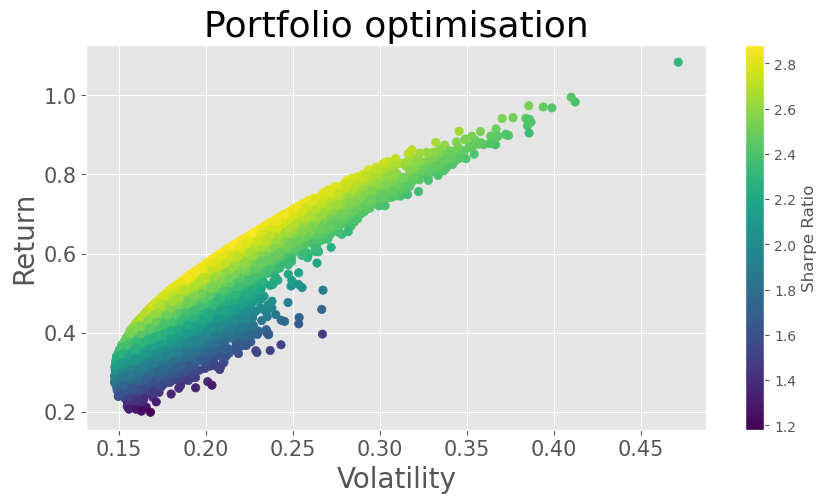

In [13]:
# Visualisation

plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns,
           c = portfolio_returns / portfolio_risks)
plt.title('Portfolio optimisation', fontsize = 26)
plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe Ratio')
plt.show()